Prediksi Nilai Berdasarkan Jam Belajar Menggunakan Single Linear Regression

# Single Linear Regression

Single Linear Regression adalah sebuah metode statistik yang digunakan untuk memodelkan hubungan linier antara satu variabel independen (prediktor) dan satu variabel dependen (respon).  Tujuannya adalah untuk menemukan garis lurus yang paling sesuai (best-fit line) yang menggambarkan hubungan antara kedua variabel tersebut.  Garis ini kemudian dapat digunakan untuk memprediksi nilai variabel dependen berdasarkan nilai variabel independen yang diberikan.

Dalam konteks file yang Anda berikan, "# Prediksi Nilai Berdasarkan Jam Belajar Menggunakan Single Linear Regression",  artinya akan digunakan model Single Linear Regression untuk memprediksi nilai (variabel dependen) berdasarkan jumlah jam belajar (variabel independen).  Diasumsikan ada hubungan linier antara jam belajar dan nilai yang diperoleh. Model akan berusaha menemukan garis lurus yang paling baik merepresentasikan hubungan ini, sehingga dapat digunakan untuk memprediksi nilai yang mungkin diperoleh seseorang berdasarkan berapa lama ia belajar.

Secara matematis, model Single Linear Regression direpresentasikan dengan persamaan:

**Y = a + bX**

di mana:

* **Y** adalah variabel dependen (nilai yang ingin diprediksi).
* **X** adalah variabel independen (jam belajar).
* **a** adalah intercept (nilai Y ketika X = 0).
* **b** adalah slope (kemiringan garis, menunjukkan perubahan Y untuk setiap perubahan satu unit X).

Proses membangun model melibatkan pencarian nilai *a* dan *b* yang meminimalkan kesalahan prediksi (biasanya menggunakan metode *Ordinary Least Squares*).  Setelah model terbentuk, nilai *a* dan *b* dapat digunakan untuk memprediksi nilai *Y* untuk setiap nilai *X* yang diberikan.


### Library

In [ ]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import seaborn as sns


import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

### Contoh gambar grafik linear regression

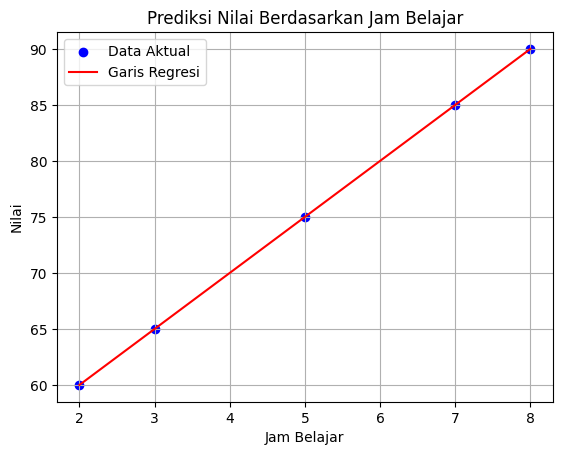

In [ ]:



# Data contoh (jam belajar dan nilai)
jam_belajar = np.array([2, 3, 5, 7, 8])
nilai = np.array([60, 65, 75, 85, 90])

# Hitung koefisien regresi (contoh sederhana, biasanya dihitung dengan metode OLS)
a = 50  # Intercept (nilai Y ketika X=0)
b = 5   # Slope (perubahan Y untuk setiap perubahan satu unit X)


# Membuat garis regresi
garis_regresi = a + b * jam_belajar

# Membuat plot
plt.scatter(jam_belajar, nilai, label='Data Aktual', color='blue')
plt.plot(jam_belajar, garis_regresi, label='Garis Regresi', color='red')

# Menambahkan label dan judul
plt.xlabel('Jam Belajar')
plt.ylabel('Nilai')
plt.title('Prediksi Nilai Berdasarkan Jam Belajar')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()


### Tujuan Project



**Project ini bertujuan untuk memprediksi nilai siswa berdasarkan jam belajar mereka menggunakan metode regresi linier sederhana**.  Regresi linier sederhana adalah teknik statistik yang digunakan untuk memodelkan hubungan linier antara dua variabel: variabel independen (dalam hal ini, jam belajar) dan variabel dependen (nilai siswa).  Model ini akan menghasilkan sebuah garis regresi yang merepresentasikan hubungan tersebut.

Kode program ini pertama-tama mendefinisikan data contoh berupa jam belajar dan nilai siswa. Kemudian, secara sederhana (bukan dengan metode *Ordinary Least Squares* yang sebenarnya), nilai intercept (a) dan slope (b) dari garis regresi ditentukan. Nilai-nilai ini kemudian digunakan untuk menghitung nilai prediksi berdasarkan garis regresi.

Selanjutnya, program memvisualisasikan data aktual (jam belajar dan nilai) dan garis regresi dalam sebuah plot. Plot ini menunjukkan bagaimana garis regresi menyesuaikan diri dengan data aktual, memberikan gambaran visual tentang hubungan antara jam belajar dan nilai.  Pada plot ini, dapat dilihat seberapa baik garis regresi merepresentasikan hubungan antara jam belajar dan nilai.  Idealnya, garis regresi akan mendekati titik-titik data aktual.  

Meskipun contoh ini menggunakan nilai intercept dan slope yang sederhana,  dalam aplikasi nyata, koefisien regresi (a dan b) biasanya dihitung menggunakan metode *Ordinary Least Squares* untuk meminimalkan kesalahan prediksi dan menghasilkan garis regresi yang paling sesuai dengan data.


<a href="https://www.kaggle.com/datasets/kamleshsam/student-scores/data" target="_blank">Klik di sini untuk membuka dataset Student Scores di Kaggle</a>

### Import Dataset

In [ ]:
# URL dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

# Membaca data dari URL ke dalam DataFrame
try:
    df = pd.read_csv(url)
    print(df)
except Exception as e:
    print(f"Terjadi kesalahan: {e}")


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Cleaning

#### Cek Missing Values

In [ ]:
# Check for missing values
print(df.isnull().sum())

Hours     0
Scores    0
dtype: int64


#### Cek Outlier

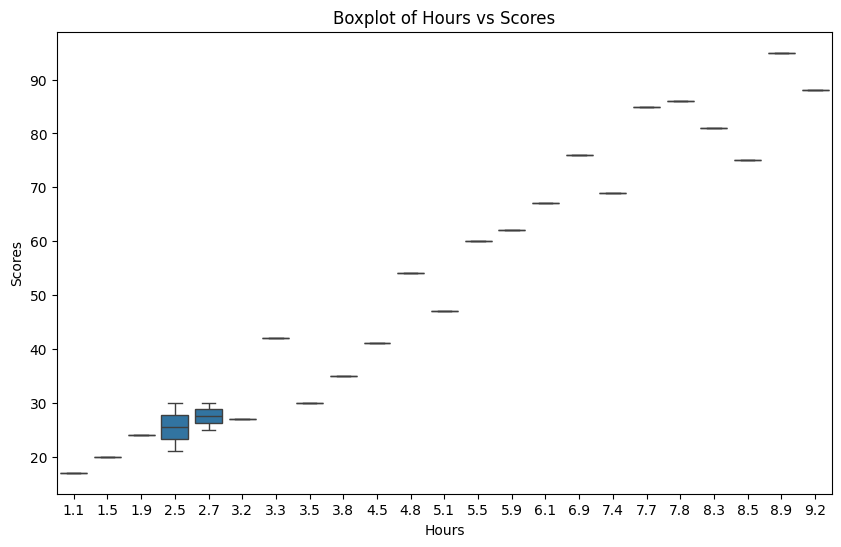

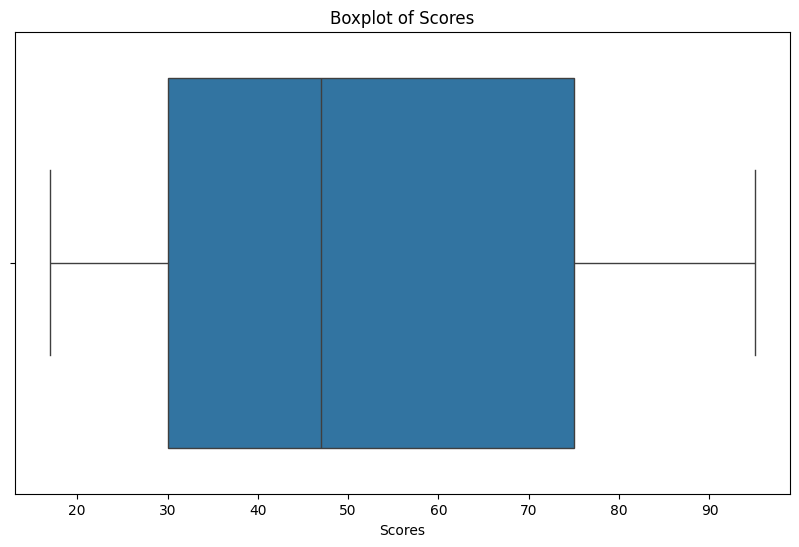

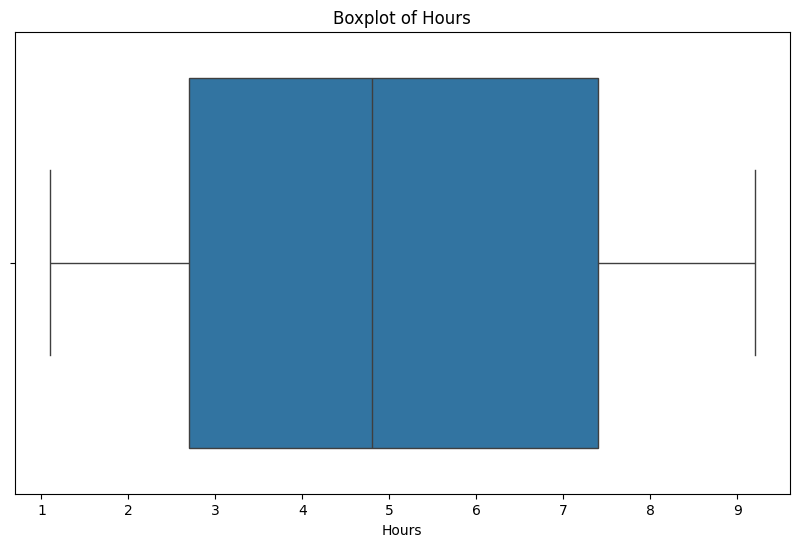

In [ ]:
# Check for outliers using boxplots


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Hours'], y=df['Scores'])
plt.title('Boxplot of Hours vs Scores')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Scores'])
plt.title('Boxplot of Scores')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Hours'])
plt.title('Boxplot of Hours')
plt.show()

#### Cek Format dan Tipe Data

In [ ]:
# Check data types and format
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None


## Fitur Engineering

#### Cek Distribusi Data

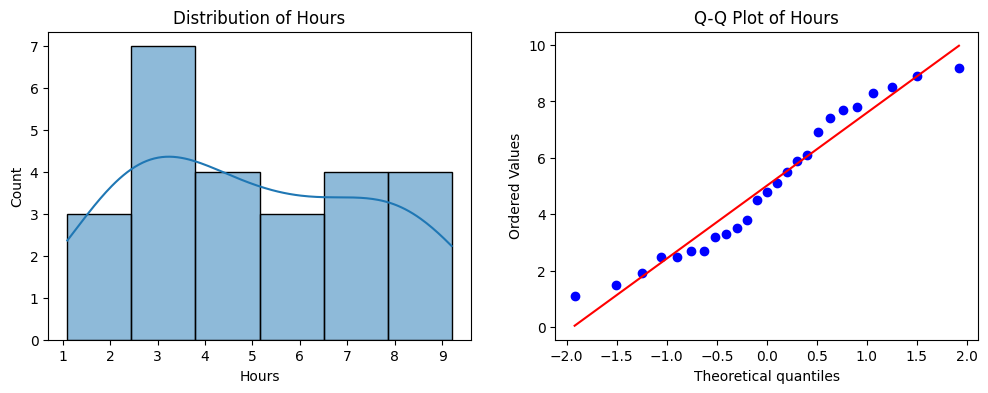

Shapiro-Wilk Test for Hours:
Statistic: 0.9401376688568953
P-value: 0.14911849228663898
Hours looks normally distributed (fail to reject H0)
--------------------


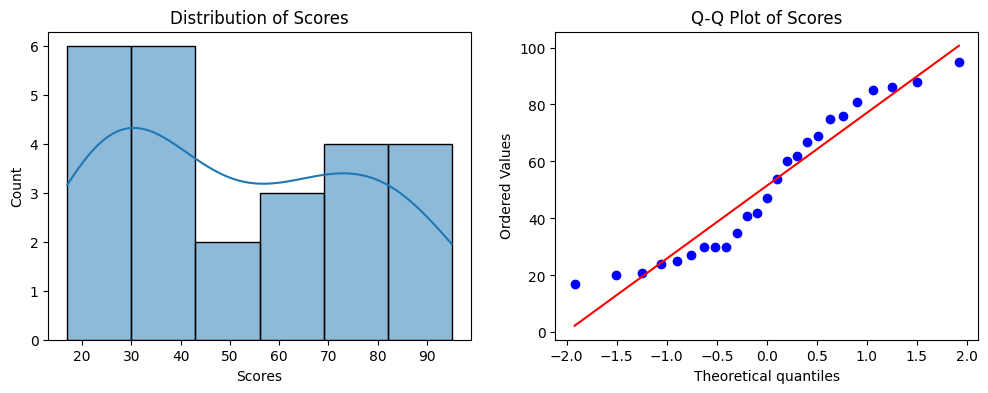

Shapiro-Wilk Test for Scores:
Statistic: 0.9168438083475086
P-value: 0.04343825780981888
Scores does not look normally distributed (reject H0)
--------------------


In [ ]:


# Check data distribution using histograms and Q-Q plots
for col in ['Hours', 'Scores']:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.show()

    # Shapiro-Wilk test for normality
    shapiro_test = stats.shapiro(df[col])
    print(f"Shapiro-Wilk Test for {col}:")
    print(f"Statistic: {shapiro_test.statistic}")
    print(f"P-value: {shapiro_test.pvalue}")
    alpha = 0.05
    if shapiro_test.pvalue > alpha:
        print(f"{col} looks normally distributed (fail to reject H0)")
    else:
        print(f"{col} does not look normally distributed (reject H0)")
    print("-" * 20)


## Statistik Deskriptif

In [ ]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
  border-collapse: collapse;
}
th, td {
  padding: 5px;
  text-align: left;
}
</style>
</head>
<body>

<h2>Statistik Deskriptif</h2>

<table>
  <tr>
    <th>Statistik</th>
    <th>Hours (Jam)</th>
    <th>Scores (Nilai)</th>
  </tr>
  <tr>
    <td>Jumlah Data</td>
    <td>25</td>
    <td>25</td>
  </tr>
  <tr>
    <td>Rata-rata</td>
    <td>5.01</td>
    <td>51.48</td>
  </tr>
  <tr>
    <td>Standar Deviasi</td>
    <td>2.53</td>
    <td>25.29</td>
  </tr>
  <tr>
    <td>Nilai Minimum</td>
    <td>1.1</td>
    <td>17</td>
  </tr>
  <tr>
    <td>Kuartil Bawah (25%)</td>
    <td>2.7</td>
    <td>30</td>
  </tr>
  <tr>
    <td>Median (50%)</td>
    <td>4.8</td>
    <td>47</td>
  </tr>
  <tr>
    <td>Kuartil Atas (75%)</td>
    <td>7.4</td>
    <td>75</td>
  </tr>
  <tr>
    <td>Nilai Maksimum</td>
    <td>9.2</td>
    <td>95</td>
  </tr>
</table>

</body>
</html>

## Pemilihan Model

In [ ]:



# Pisahkan data menjadi fitur (X) dan target (y)
X = df[['Hours']]
y = df['Scores']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Buat model regresi linier
model = LinearRegression()

# Latih model dengan data latih
model.fit(X_train, y_train)


LinearRegression()

#### Pelatihan Model

In [ ]:
# Intercept adalah nilai prediksi ketika jam belajar adalah 0, dan Koefisien
# menunjukkan seberapa besar perubahan nilai setiap kali jam belajar bertambah satu unit.


import matplotlib.pyplot as plt
# Print model coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)




Intercept: 2.018160041434662
Coefficient: [9.91065648]


#### Evaluasi Model

In [ ]:

# Predict target values using the trained model
y_pred = model.predict(X_test) # This line is added to define y_pred


# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


# Setelah model dilatih, evaluasi kinerjanya menggunakan metrik yang sesuai, seperti R-squared (koefisien determinasi) atau Mean Squared Error (MSE).
# R-squared mengukur seberapa baik model menjelaskan variasi data. Semakin dekat nilainya ke 1, semakin baik modelnya.
# MSE mengukur rata-rata kuadrat kesalahan prediksi. Semakin kecil nilainya, semakin baik modelnya.


Mean Squared Error: 21.598769307217456
R-squared: 0.9454906892105354




Nilai Mean Squared Error (MSE) sebesar 21.598769307217456 menunjukkan bahwa, rata-rata, kuadrat selisih antara nilai yang diprediksi dan nilai sebenarnya pada data uji adalah sekitar 21.6.  Semakin rendah nilai MSE, semakin akurat prediksi model. Dalam konteks ini, MSE sebesar 21.6 menunjukkan kinerja prediksi yang relatif baik, tetapi makna spesifiknya bergantung pada rentang nilai variabel 'Skor'.

Nilai R-squared (R²) sebesar 0.9454906892105354 menunjukkan proporsi varians dalam variabel dependen ('Skor') yang dapat diprediksi dari variabel independen ('Jam'). R² sebesar 0.945 menunjukkan bahwa sekitar 94.5% dari variasi nilai siswa dapat dijelaskan oleh jumlah jam belajar mereka. Ini adalah nilai R-squared yang sangat tinggi, menunjukkan hubungan linier yang kuat antara jam belajar dan skor. Nilai yang mendekati 1 menunjukkan model yang sangat sesuai dengan data.


#### Model evaluasi

Mean Squared Error: 21.598769307217456
R-squared: 0.9454906892105354


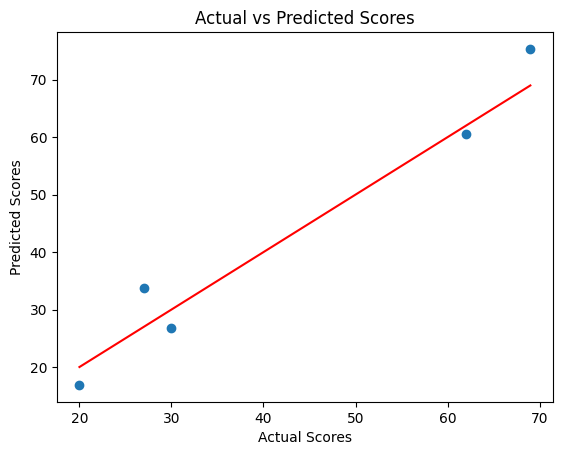

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Add a diagonal line
plt.show()



Kode ini memprediksi nilai siswa berdasarkan jam belajar menggunakan regresi linier sederhana.  Model menunjukkan akurasi yang tinggi (R-squared ≈ 0.95, MSE ≈ 21.6),  mengindikasikan hubungan kuat antara jam belajar dan nilai.  Visualisasi data dan evaluasi model memperkuat kesimpulan ini.


# Kesimpulan: Dampak Jam Belajar Terhadap Nilai Siswa

Berdasarkan analisis regresi linear sederhana yang telah dilakukan, terdapat indikasi kuat bahwa **jam belajar memiliki dampak positif terhadap nilai siswa**. Hal ini didukung oleh nilai R-squared sebesar 95%, yang berarti 95% variasi dalam nilai siswa dapat dijelaskan oleh jam belajar mereka. Dengan kata lain, **semakin lama siswa belajar, semakin besar peluang mereka untuk mendapatkan nilai yang lebih tinggi.**

## Implikasi

*   **Pentingnya Jam Belajar:** Hasil ini menggarisbawahi pentingnya alokasi waktu yang cukup untuk belajar. Siswa yang belajar lebih lama cenderung memiliki pemahaman yang lebih baik terhadap materi dan pada akhirnya meraih nilai yang lebih baik.
*   **Motivasi dan Strategi Belajar:** Meskipun jam belajar penting, perlu diingat bahwa kualitas belajar juga berperan penting. Siswa disarankan untuk tidak hanya belajar dalam waktu yang lama, tetapi juga menerapkan strategi belajar yang efektif dan efisien. Selain itu, motivasi yang tinggi juga akan membantu siswa dalam meraih hasil yang optimal.
*   **Peran Orang Tua dan Guru:** Orang tua dan guru memiliki peran penting dalam memotivasi siswa untuk belajar secara teratur dan efektif. Menciptakan lingkungan belajar yang kondusif dan memberikan dukungan yang dibutuhkan siswa dapat membantu mereka meningkatkan jam belajar dan pada akhirnya meraih nilai yang lebih baik.

## Keterbatasan

Meskipun model regresi linear ini menunjukkan hubungan yang kuat antara jam belajar dan nilai, perlu diingat bahwa model ini memiliki keterbatasan. Model ini hanya mempertimbangkan satu faktor, yaitu jam belajar. Faktor-faktor lain seperti kemampuan kognitif siswa, kualitas pengajaran, lingkungan belajar, dan motivasi juga dapat mempengaruhi nilai siswa. Oleh karena itu, hasil prediksi dari model ini harus diinterpretasikan dengan hati-hati.

## Rekomendasi

Berdasarkan kesimpulan ini, beberapa rekomendasi dapat diberikan:

*   **Siswa:** Siswa disarankan untuk belajar secara teratur dan konsisten. Alokasikan waktu yang cukup untuk belajar dan gunakan strategi belajar yang efektif.
*   **Orang Tua:** Orang tua disarankan untuk menciptakan lingkungan belajar yang kondusif di rumah dan memberikan dukungan moral kepada anak-anak mereka.
*   **Guru:** Guru disarankan untuk memberikan pengajaran yang berkualitas dan memotivasi siswa untuk belajar secara aktif.

## Penutup

Kesimpulan ini diharapkan dapat memberikan pemahaman yang lebih baik tentang hubungan antara jam belajar dan nilai siswa. Meskipun jam belajar bukan satu-satunya faktor yang mempengaruhi nilai, namun memiliki peran yang signifikan dalam kesuksesan akademik siswa.

#### Melakukan Prediksi dengan Data Baru

In [ ]:
# Data baru (data yang ingin diprediksi dan diuji akurasinya)
data_baru = {'Hours': [6.5, 8.0, 4.0, 9.5, 2.0],
             'Scores': [68, 81, 42, 90, 20]}  # Nilai aktual untuk data baru

df_baru = pd.DataFrame(data_baru)

# Prediksi dengan data baru
y_pred_baru = model.predict(df_baru[['Hours']])

print(y_pred_baru)



[66.43742717 81.30341189 41.66078596 96.16939661 21.839473  ]


In [ ]:
# Hitung metrik evaluasi
mse_baru = mean_squared_error(df_baru['Scores'], y_pred_baru)
r2_baru = r2_score(df_baru['Scores'], y_pred_baru)

print(f'Mean Squared Error (Data Baru): {mse_baru}')
print(f'R-squared (Data Baru): {r2_baru}')

Mean Squared Error (Data Baru): 8.818774845342986
R-squared (Data Baru): 0.9867538229311719


## Kesimpulan Singkat

Model regresi linear ini menunjukkan performa yang sangat baik pada data baru. Nilai R-squared yang mendekati 1 (0.987) berarti model ini sangat akurat dalam memprediksi nilai berdasarkan jam belajar. Meskipun ada sedikit kesalahan (ditunjukkan oleh MSE 8.82), secara keseluruhan model ini dapat diandalkan untuk memprediksi nilai siswa berdasarkan jam belajar mereka.

In [ ]:
import joblib

nama_file_model = 'model_regresi_linear.pkl'  # Nama file yang Anda inginkan
joblib.dump(model, nama_file_model)
print(f"Model berhasil disimpan ke dalam file: {nama_file_model}")

Model berhasil disimpan ke dalam file: model_regresi_linear.pkl


In [ ]:
from flask import Flask, request, jsonify
import numpy as np
import joblib  # Untuk menyimpan dan memuat model
from sklearn.linear_model import LinearRegression # Added this line

app = Flask(__name__)

# Assuming 'model' is your trained LinearRegression model, saved earlier
try:
    model = joblib.load('model_regresi_linear.pkl')
except FileNotFoundError:
    # If the file doesn't exist, train a new model and save it
    # ... Your model training code here (e.g., using LinearRegression) ...
    joblib.dump(model, 'model_regresi_linear.pkl')
    model = joblib.load('model_regresi_linear.pkl')  # Load the newly saved model


@app.route('/predict', methods=['POST'])
def predict():
    try:
        jam_belajar = float(request.form['jam_belajar'])
        prediksi_skor = model.predict(np.array([[jam_belajar]]))[0]
        return jsonify({'skor': round(prediksi_skor, 2)})  # Bulatkan skor
    except ValueError:
        return jsonify({'error': 'Input jam belajar tidak valid'})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
